Assigntment 2
<br>Create a visualization analyzing provided weather data. 
<br>Must show daily maximum and minimum temperatures from 2005-2014, and record-breaking highs and lows in 2015. 

In [1]:
import pandas as pd
import numpy
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('weatherdata.csv')
#documentation indicates values in raw data are in tenths of deg celsius, so /10
df['Data_Value'] = df['Data_Value']/10
df.rename(columns = {'Data_Value':'Temp' }, inplace=True)

In [2]:
#make two dataframes from the raw data, one with only max temps, and one with only min
dfmax = df[df['Element']=='TMAX']
dfmin= df[df['Element']=='TMIN']

In [3]:
#multiple temp readings for each date need to be grouped (multiple sensor stations), this produces a groupby object
dfmax = dfmax.groupby('Date')
dfmin = dfmin.groupby('Date')

In [4]:
#take the maximum/minimum 'Temp' value observed on each date, and drop days from the leap years
#NOTE - Limitation: I am dropping Dec 31 in each leap year because of the numbering system for day_of_year below. Dec 31 is 366 for leap years. Deleting Feb29 would not change this. 
dfmax = dfmax['Temp'].max().drop(['2008-12-31','2012-12-31'])
dfmin = dfmin['Temp'].min().drop(['2008-12-31','2012-12-31'])

In [5]:
#the above produces a series, but I need a dataframe to work with 'Date' and 'Temp' as separate columns
dfmax = pd.DataFrame(dfmax)
dfmin = pd.DataFrame(dfmin)

In [6]:
#prefer to work with 'Date' as a column, not an index so reset
dfmax.reset_index(inplace=True)
dfmin.reset_index(inplace=True)

In [7]:
#set 'Date' to datetime so I can use operands and day_of_year method below
pd.to_datetime(dfmax['Date'])
pd.to_datetime(dfmin['Date'])

0      2005-01-01
1      2005-01-02
2      2005-01-03
3      2005-01-04
4      2005-01-05
          ...    
4010   2015-12-27
4011   2015-12-28
4012   2015-12-29
4013   2015-12-30
4014   2015-12-31
Name: Date, Length: 4015, dtype: datetime64[ns]

In [8]:
#isolate the 2015 data, instructions want to plot 2015 seprately as a scatter
dfmax2015 = dfmax[dfmax['Date']>=str(2015)]
dfmin2015 = dfmin[dfmin['Date']>=str(2015)]

In [9]:
#2005-2014 data will be lines
dfmax0514 = dfmax[dfmax['Date']<str(2015)]
dfmin0514 = dfmin[dfmin['Date']<str(2015)]

In [10]:
#doing to_datetime again because the above -for some reason- turns the 'Date' dtype back to 'object'
#at this point the dataframes contain 3650 values, one for each day over 10 years
dfmax2015['Date'] = pd.to_datetime(dfmax2015['Date'])
dfmin2015['Date'] = pd.to_datetime(dfmin2015['Date'])

dfmax0514['Date'] = pd.to_datetime(dfmax0514['Date'])
dfmin0514['Date'] = pd.to_datetime(dfmin0514['Date'])

C:\Users\tkzdev\AppData\Local\Temp\ipykernel_34356\676192028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmax2015['Date'] = pd.to_datetime(dfmax2015['Date'])
C:\Users\tkzdev\AppData\Local\Temp\ipykernel_34356\676192028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmin2015['Date'] = pd.to_datetime(dfmin2015['Date'])
C:\Users\tkzdev\AppData\Local\Temp\ipykernel_34356\676192028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [11]:
#I have the 'Date' column formatted as yyyy-mm-dd, but I want to group by the day of the year
#Theres a method for parsing out the day of year! Returns a value from 1-365 (except leap years)
#these all produce groupby objects representing 10 years of dates grouped into the day-of-year
# I don't need to do this for the 2015 data, but its easier and more consistent, I think
a = dfmax2015.groupby(dfmax2015['Date'].dt.day_of_year)
b = dfmin2015.groupby(dfmin2015['Date'].dt.day_of_year)

c = dfmax0514.groupby(dfmax0514['Date'].dt.dayofyear)
d = dfmin0514.groupby(dfmin0514['Date'].dt.day_of_year)

In [12]:
#highest highs and lowest lows from the 10 years of 2005-2014 data, grouped by day-of-year as above 
c = c['Temp'].max()
d = d['Temp'].min()

#same with 2015 data 
a = a['Temp'].max()
b = b['Temp'].min()

In [13]:
#renaming columns and making one big DataFrame out of the 4 above, to do basic math to isolate 2015 data that is 
#above or below 2005-2014 data
datatemp = {'max2015': a, 'min2015':b, 'max0514':c, 'min0514':d}
dftemp = pd.DataFrame(datatemp)

In [14]:
#wherever 2015 data is above/below the 2005-2014 highs/lows respectively
dftemp['2015high'] = dftemp['max2015'][dftemp['max2015']>dftemp['max0514']]
dftemp['2015low'] = dftemp['min2015'][dftemp['min2015']<dftemp['min0514']]

In [15]:
#dropna means these only contain those 'record-breaker' data, and I can plot that!
htemp = dftemp['2015high'].dropna()
ltemp = dftemp['2015low'].dropna()

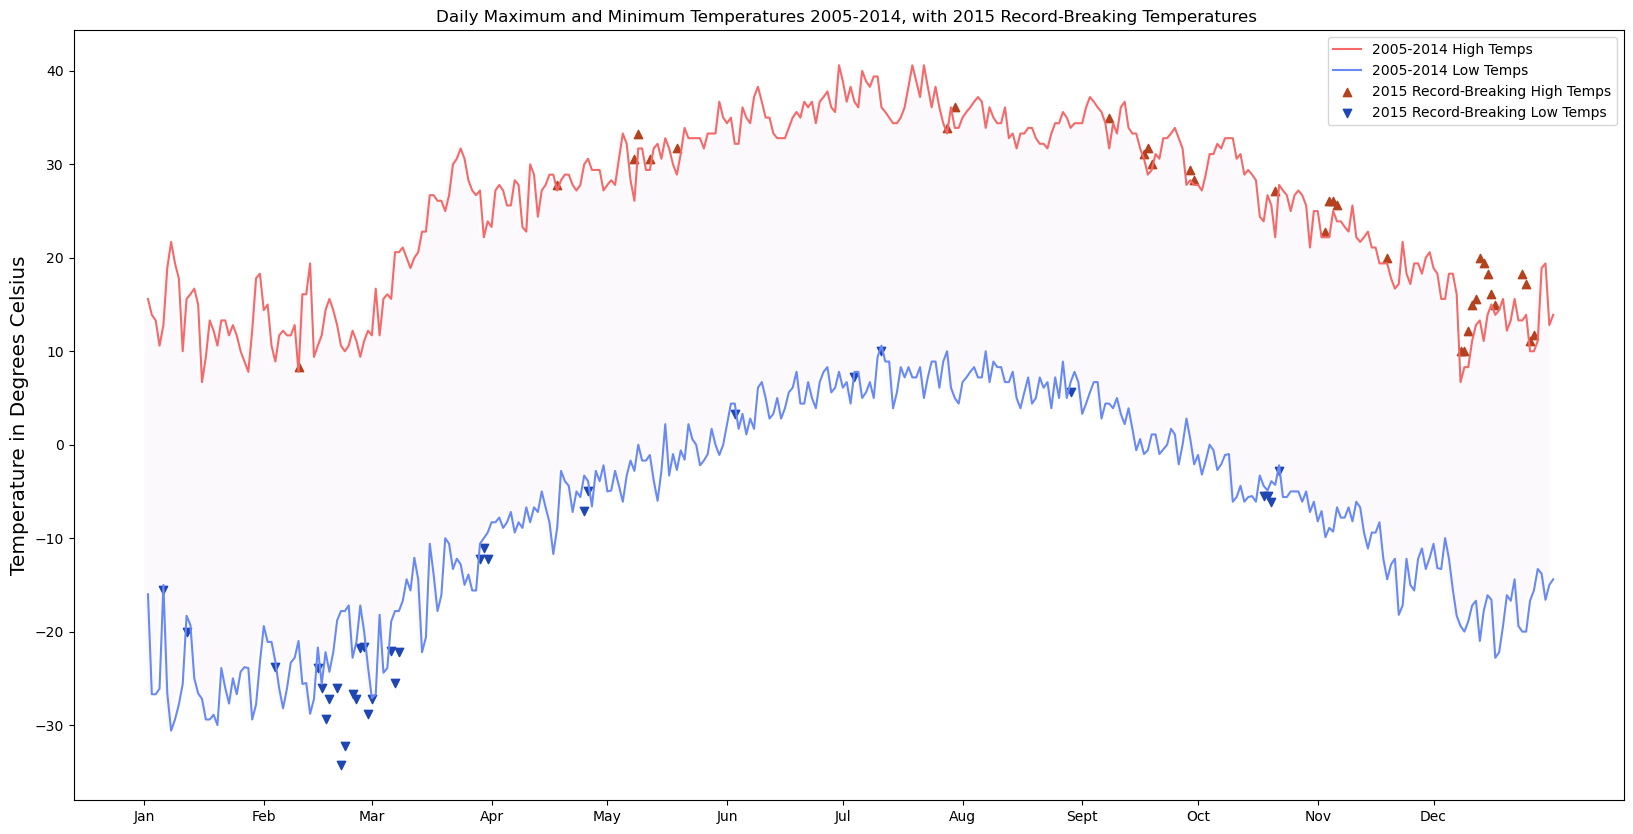

In [16]:
#the matplotlib magic
plt.figure(figsize=(20,10))

#I did the labels and ticks manually, there's probably a more clever way but *shrug*
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks([0.,  31.,  59.,  90., 120., 151., 181., 212., 243., 273., 304.,
       334.], labels)

plt.plot(c, c= '#f56969', label='2005-2014 High Temps')
plt.plot(d, c= '#698af5', label='2005-2014 Low Temps')
plt.gca().fill_between(range(len(c)), d, c, facecolor='#f2ebf5', alpha=0.25)

plt.scatter(htemp.index, htemp, c= '#b4421f', marker='^', label='2015 Record-Breaking High Temps')
plt.scatter(ltemp.index,ltemp, c= '#1f47b4' , marker='v', label='2015 Record-Breaking Low Temps')

plt.ylabel('Temperature in Degrees Celsius', fontsize='x-large')
plt.legend()
plt.title('Daily Maximum and Minimum Temperatures 2005-2014, with 2015 Record-Breaking Temperatures ')

plt.savefig('Assignment2tzellers.png', format='png')

#cool '#0599f5'
#cold '#698af5'
#warm '#f56969'
#hot '#b4421f'